In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

# 1- Wrangle data

# A- Assessing Data

In [2]:
df = pd.read_csv('E:/Advanced Data Analysis/Session1/train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**we can find in Item_Weight Missed value**

In [4]:
mean1 = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**explore Outlet_Size** 

In [5]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [6]:
column = ['Item_Visibility','Outlet_Location_Type']

df.drop(columns=column ,axis=1 , inplace=True)

# df['Item_Visibility'].drop(columns=df['Item_Visibility'],axsis=1,inplace=True)

# df['Outlet_Location_Type'].drop(columns=df['Outlet_Location_Type'],axsis=1, inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,Medium,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,High,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,NaN,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Supermarket Type2,1845.5976


In [7]:
df['Outlet_Size'].fillna(value='other',inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,Meat,141.6180,OUT049,1999,Medium,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,Fruits and Vegetables,182.0950,OUT010,1998,other,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,Household,53.8614,OUT013,1987,High,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Snack Foods,214.5218,OUT013,1987,High,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,Baking Goods,108.1570,OUT045,2002,other,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,Health and Hygiene,85.1224,OUT035,2004,Small,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,Snack Foods,103.1332,OUT018,2009,Medium,Supermarket Type2,1845.5976


In [22]:
df[df['Item_Outlet_Sales']== 13086.964800]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
7188,NCE42,12.857645,Low Fat,Household,234.9958,OUT027,1985,Medium,Supermarket Type3,13086.9648


**sort the dataframe**

In [33]:
df.sort_values(by=['Item_Outlet_Sales'],inplace=True)

In [34]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
906,DRK12,9.500000,Low Fat,Soft Drinks,32.8900,OUT010,1998,other,Grocery Store,33.2900
6950,NCR42,9.105000,Low Fat,Household,33.3900,OUT010,1998,other,Grocery Store,33.2900
2571,FDU21,12.857645,Regular,Snack Foods,35.0558,OUT019,1985,Small,Grocery Store,33.9558
3053,NCL41,12.857645,Low Fat,Health and Hygiene,34.3216,OUT019,1985,Small,Grocery Store,34.6216
7388,FDQ47,7.155000,Regular,Breads,33.8874,OUT010,1998,other,Grocery Store,35.2874
...,...,...,...,...,...,...,...,...,...,...
6541,FDI50,12.857645,Regular,Canned,228.0352,OUT027,1985,Medium,Supermarket Type3,10306.5840
4349,FDP33,12.857645,Low Fat,Snack Foods,254.2672,OUT027,1985,Medium,Supermarket Type3,10993.6896
1450,FDZ20,12.857645,Low Fat,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Supermarket Type3,11445.1020
5223,FDQ19,12.857645,Regular,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Supermarket Type3,12117.5600


In [62]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [67]:
df.replace(df['Item_Fat_Content']=='LF','Low Fat',inplace=True)
df.replace(df['Item_Fat_Content']=='reg','Low Fat',inplace=True)
df.replace(df['Item_Fat_Content']=='low fat','Low Fat',inplace=True)
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
906,DRK12,9.500000,Low Fat,Soft Drinks,32.8900,OUT010,1998,other,Grocery Store,33.2900
6950,NCR42,9.105000,Low Fat,Household,33.3900,OUT010,1998,other,Grocery Store,33.2900
2571,FDU21,12.857645,Regular,Snack Foods,35.0558,OUT019,1985,Small,Grocery Store,33.9558
3053,NCL41,12.857645,Low Fat,Health and Hygiene,34.3216,OUT019,1985,Small,Grocery Store,34.6216
7388,FDQ47,7.155000,Regular,Breads,33.8874,OUT010,1998,other,Grocery Store,35.2874
...,...,...,...,...,...,...,...,...,...,...
6541,FDI50,12.857645,Regular,Canned,228.0352,OUT027,1985,Medium,Supermarket Type3,10306.5840
4349,FDP33,12.857645,Low Fat,Snack Foods,254.2672,OUT027,1985,Medium,Supermarket Type3,10993.6896
1450,FDZ20,12.857645,Low Fat,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Supermarket Type3,11445.1020
5223,FDQ19,12.857645,Regular,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Supermarket Type3,12117.5600


# Q-1 Relation between Outlet_type and Item_outlet_sales

In [45]:
s=df.groupby('Outlet_Type').Item_Outlet_Sales.sum()
print(type(s))

<class 'pandas.core.series.Series'>


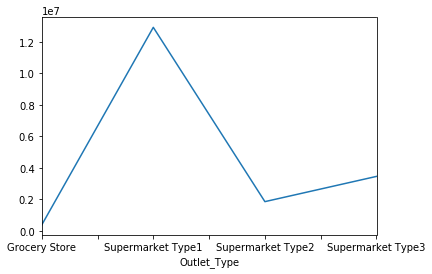

In [46]:
s.plot()

**the most 5 sales & the 5 least sales**

In [39]:
most = df[:5]
least = df[-5:]

print(most)
print(least)

     Item_Identifier  Item_Weight Item_Fat_Content           Item_Type  \
906            DRK12     9.500000          Low Fat         Soft Drinks   
6950           NCR42     9.105000          Low Fat           Household   
2571           FDU21    12.857645          Regular         Snack Foods   
3053           NCL41    12.857645          Low Fat  Health and Hygiene   
7388           FDQ47     7.155000          Regular              Breads   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
906    32.8900            OUT010                       1998       other   
6950   33.3900            OUT010                       1998       other   
2571   35.0558            OUT019                       1985       Small   
3053   34.3216            OUT019                       1985       Small   
7388   33.8874            OUT010                       1998       other   

        Outlet_Type  Item_Outlet_Sales  
906   Grocery Store            33.2900  
6950  Grocery Store   

In [48]:
m = df.groupby('Item_Fat_Content').Item_Outlet_Sales.sum()
m

Item_Fat_Content
LF         6.552424e+05
Low Fat    1.101503e+07
Regular    6.457454e+06
low fat    2.338270e+05
reg        2.295765e+05
Name: Item_Outlet_Sales, dtype: float64

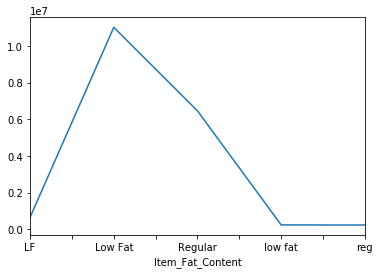

In [49]:
m.plot()

In [50]:
n = df.groupby('Item_Type').Item_Outlet_Sales.sum()
n

Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64

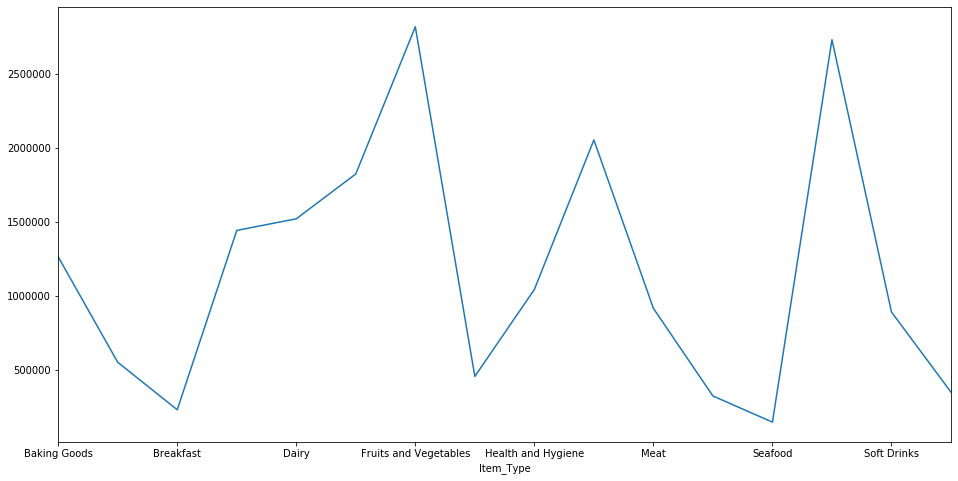

In [55]:
n.plot(figsize=(16,8))

In [59]:
l = df.groupby('Outlet_Size').Item_Outlet_Sales.sum()
l

Outlet_Size
High      2.142664e+06
Medium    7.489719e+06
Small     4.566212e+06
other     4.392531e+06
Name: Item_Outlet_Sales, dtype: float64

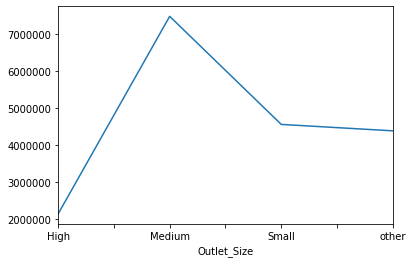

In [60]:
l.plot()

In [ ]:
01004974999
01555201729

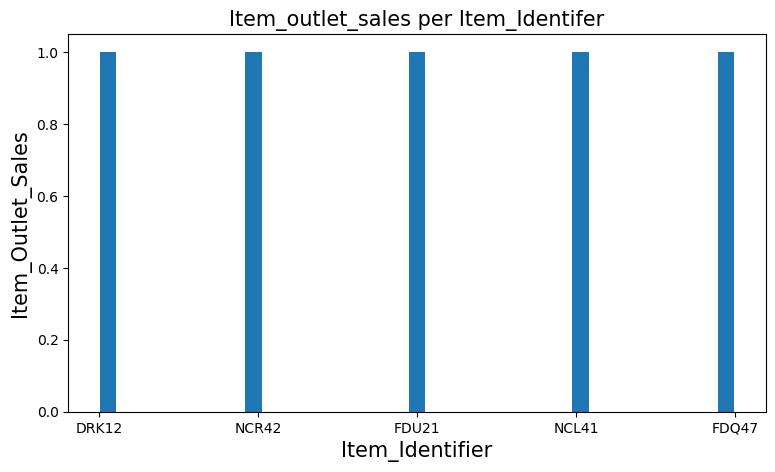

In [37]:
# for most 

#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Item_Identifier', fontsize = 15)
#On y-axis 
plt.ylabel('Item_Outlet_Sales', fontsize=15)
#Name of the graph
plt.title('Item_outlet_sales per Item_Identifer', fontsize=15)

#giving a histogram plot
plt.hist(most['Item_Identifier'],rwidth = 0.9, bins =35)
#displays the plot
plt.show()

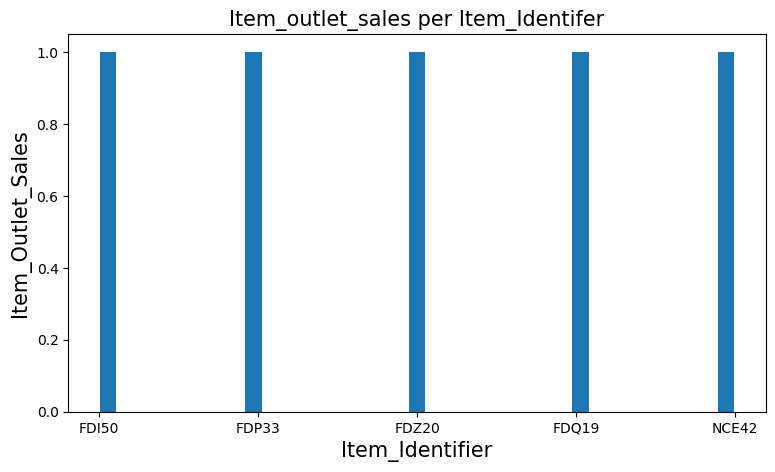

In [40]:
#for least

#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Item_Identifier', fontsize = 15)
#On y-axis 
plt.ylabel('Item_Outlet_Sales', fontsize=15)
#Name of the graph
plt.title('Item_outlet_sales per Item_Identifer', fontsize=15)

#giving a histogram plot
plt.hist(least['Item_Identifier'],rwidth = 0.9, bins =35)
#displays the plot
plt.show()

In [27]:
df.groupby('Item_Identifier').Item_Outlet_Sales.sum()

Item_Identifier
DRA12    11061.6012
DRA24    15723.5328
DRA59    20915.4412
DRB01     4554.0720
DRB13    12144.1920
            ...    
NCZ30    12653.5290
NCZ41     9137.4392
NCZ42    19199.0088
NCZ53    15073.7120
NCZ54    22743.7280
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

In [28]:
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDX31     9
NCJ30     9
NCF42     9
         ..
FDN52     1
FDQ60     1
FDE52     1
FDY43     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

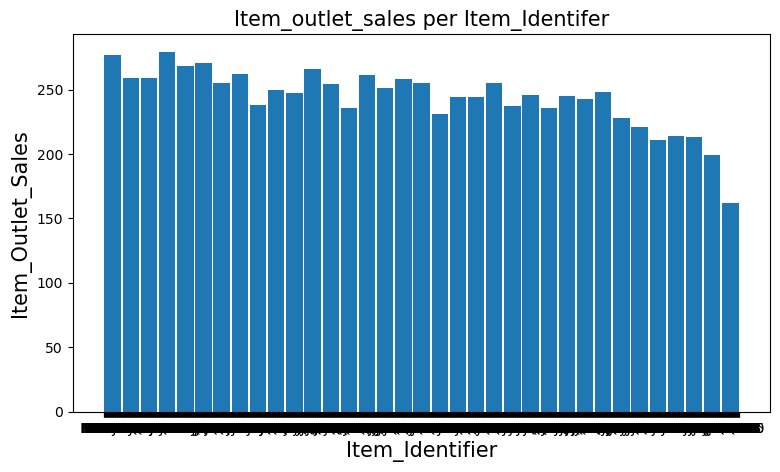

In [32]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Item_Identifier', fontsize = 15)
#On y-axis 
plt.ylabel('Item_Outlet_Sales', fontsize=15)
#Name of the graph
plt.title('Item_outlet_sales per Item_Identifer', fontsize=15)

#giving a histogram plot
plt.hist(df['Item_Identifier'],   rwidth = 0.9, bins =35)
#displays the plot
plt.show()


In [61]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
906,DRK12,9.500000,Low Fat,Soft Drinks,32.8900,OUT010,1998,other,Grocery Store,33.2900
6950,NCR42,9.105000,Low Fat,Household,33.3900,OUT010,1998,other,Grocery Store,33.2900
2571,FDU21,12.857645,Regular,Snack Foods,35.0558,OUT019,1985,Small,Grocery Store,33.9558
3053,NCL41,12.857645,Low Fat,Health and Hygiene,34.3216,OUT019,1985,Small,Grocery Store,34.6216
7388,FDQ47,7.155000,Regular,Breads,33.8874,OUT010,1998,other,Grocery Store,35.2874
...,...,...,...,...,...,...,...,...,...,...
6541,FDI50,12.857645,Regular,Canned,228.0352,OUT027,1985,Medium,Supermarket Type3,10306.5840
4349,FDP33,12.857645,Low Fat,Snack Foods,254.2672,OUT027,1985,Medium,Supermarket Type3,10993.6896
1450,FDZ20,12.857645,Low Fat,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Supermarket Type3,11445.1020
5223,FDQ19,12.857645,Regular,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Supermarket Type3,12117.5600
